In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, sys
import ipywidgets as widgets

import os, sys
os.chdir('..')
# root_dir = os.path.dirname(os.path.abspath('')
# if not root_dir in sys.path: sys.path.append(root_dir)
# print(root_dir)

In [2]:
%load_ext autoreload
%autoreload 2

from darkMatter import darkMatter
from general.plot_statistics import *
from general.utils import set_plot_params

from empirical.model import *

In [3]:
## setting simulation parameters
steps=100
plot_ax3D=True
save=0
file_format='png'
rerun=True
compile=False

In [4]:
def set_options(nI=1,nE=1):
    ## setting network parameters
    L = 1

    Psi_0 = 0.
    alpha_0 = 0.01

    def create_population_values(I_val,E_val):

        I_val = I_val if type(I_val)==list else [I_val]
        E_val = E_val if type(E_val)==list else [E_val]

        val = I_val*nI
        val.extend(E_val*nE)
        return val

    kappa = create_population_values(1/nI if nI else 0,1/nE if nE else 0)
    J0 = create_population_values(-1.,1.)
    S = create_population_values(1,2)
    tau_I = create_population_values(0.01,[0.005,0.2])

    J_l = np.ones((L,L))
    np.fill_diagonal(J_l,0)

    options = {
        # count of layers, populations, PSPs
        'L': L,
        'P': len(S),
        'S': S,     # contains number of synapses for each population

        # layer level parameters
        'eps': 1./np.sqrt(2),
        'eta': 0.9,
        'J0_l': J_l,

        # population level parameters
        'I_ext': 1,
        'rateWnt': 1.,
        'kappa': kappa,
        'alpha_0': alpha_0,
        'Psi_0': Psi_0,
        'tau_M': 0.01,
        'J0': J0,

        # psp level parameters
        # 'tau_I': [0.01,0.005,0.2,0.005,0.2],
        'tau_I': tau_I,
        'tau_n': 0.3,
        'tau_norm': 1.,

        # 'order': ['tau_G','n','alpha_0','rateWnt','eta','eps'],
        'mode': 0,
        'mode_stats': 1,
        'mode_calc': 0,
        'mode_selfcon': 1,
        'simulation': {
            # for each iteration parameter, specify (layer,population,psp)-tuple
            # specify -1 if a level of hierarchy is non-applicable
            # specify 'None' if should be applied to all candidates
            # 'rateWnt': [0.,20.],
            'Psi_0': [-0.15,0.15],
            #'tau_I': [0,0.05],
            #'rateWnt': [0.,5.],
            'alpha_0': [0.,0.02],
            'sim_prim': [0,1,0],       # when population parameters are iterated, specify population number(s) (negative = all)
            #'sim_prim': [0,nI+nE-1,0],       # when population parameters are iterated, specify population number(s) (negative = all)
            #'sim_sec': [0,nI+nE-1,0],     # when synaptic timeconstants are iterated, specify number within population
            'sim_sec': [0,1,0],
        }
    }
    return options

In [5]:
nI = 2
nE = 0
options = set_options(nI=nI,nE=nE)
#options['simulation']['Psi_0'] = [0.0,0.1]
#options['simulation']['alpha_0'] = [0,0.02]
res = darkMatter(steps=steps,options=options,rerun=True,compile=True)

order = list(options['simulation'].keys())

Psi_0 [-0.147 -0.144 -0.141 -0.138 -0.135 -0.132 -0.129 -0.126 -0.123 -0.12
 -0.117 -0.114 -0.111 -0.108 -0.105 -0.102 -0.099 -0.096 -0.093 -0.09
 -0.087 -0.084 -0.081 -0.078 -0.075 -0.072 -0.069 -0.066 -0.063 -0.06
 -0.057 -0.054 -0.051 -0.048 -0.045 -0.042 -0.039 -0.036 -0.033 -0.03
 -0.027 -0.024 -0.021 -0.018 -0.015 -0.012 -0.009 -0.006 -0.003  0.
  0.003  0.006  0.009  0.012  0.015  0.018  0.021  0.024  0.027  0.03
  0.033  0.036  0.039  0.042  0.045  0.048  0.051  0.054  0.057  0.06
  0.063  0.066  0.069  0.072  0.075  0.078  0.081  0.084  0.087  0.09
  0.093  0.096  0.099  0.102  0.105  0.108  0.111  0.114  0.117  0.12
  0.123  0.126  0.129  0.132  0.135  0.138  0.141  0.144  0.147  0.15 ]
alpha_0 [0.0002 0.0004 0.0006 0.0008 0.001  0.0012 0.0014 0.0016 0.0018 0.002
 0.0022 0.0024 0.0026 0.0028 0.003  0.0032 0.0034 0.0036 0.0038 0.004
 0.0042 0.0044 0.0046 0.0048 0.005  0.0052 0.0054 0.0056 0.0058 0.006
 0.0062 0.0064 0.0066 0.0068 0.007  0.0072 0.0074 0.0076 0.0078 0.008
 0.008

In [27]:
nI = 2
nE = 0
options_ = set_options(nI=nI,nE=nE)
del options_['simulation']['Psi_0']

#options['simulation']['Psi_0'] = [0.0,0.1]
options_['simulation']['rateWnt'] = [0,5]
res_ = darkMatter(steps=steps,options=options_,rerun=True,compile=True)
order_ = list(options['simulation'].keys())
order_[0] = 'rateWnt'

alpha_0 [0.0002 0.0004 0.0006 0.0008 0.001  0.0012 0.0014 0.0016 0.0018 0.002
 0.0022 0.0024 0.0026 0.0028 0.003  0.0032 0.0034 0.0036 0.0038 0.004
 0.0042 0.0044 0.0046 0.0048 0.005  0.0052 0.0054 0.0056 0.0058 0.006
 0.0062 0.0064 0.0066 0.0068 0.007  0.0072 0.0074 0.0076 0.0078 0.008
 0.0082 0.0084 0.0086 0.0088 0.009  0.0092 0.0094 0.0096 0.0098 0.01
 0.0102 0.0104 0.0106 0.0108 0.011  0.0112 0.0114 0.0116 0.0118 0.012
 0.0122 0.0124 0.0126 0.0128 0.013  0.0132 0.0134 0.0136 0.0138 0.014
 0.0142 0.0144 0.0146 0.0148 0.015  0.0152 0.0154 0.0156 0.0158 0.016
 0.0162 0.0164 0.0166 0.0168 0.017  0.0172 0.0174 0.0176 0.0178 0.018
 0.0182 0.0184 0.0186 0.0188 0.019  0.0192 0.0194 0.0196 0.0198 0.02  ]
rateWnt [0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4
 1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.   2.05 2.1
 2.15 2.2  2.25 2.3  2.35 2.4  2.45 2.5  2.55 2.6  2.65 2.7  2.75 2.8
 2.

<IPython.core.display.Javascript object>


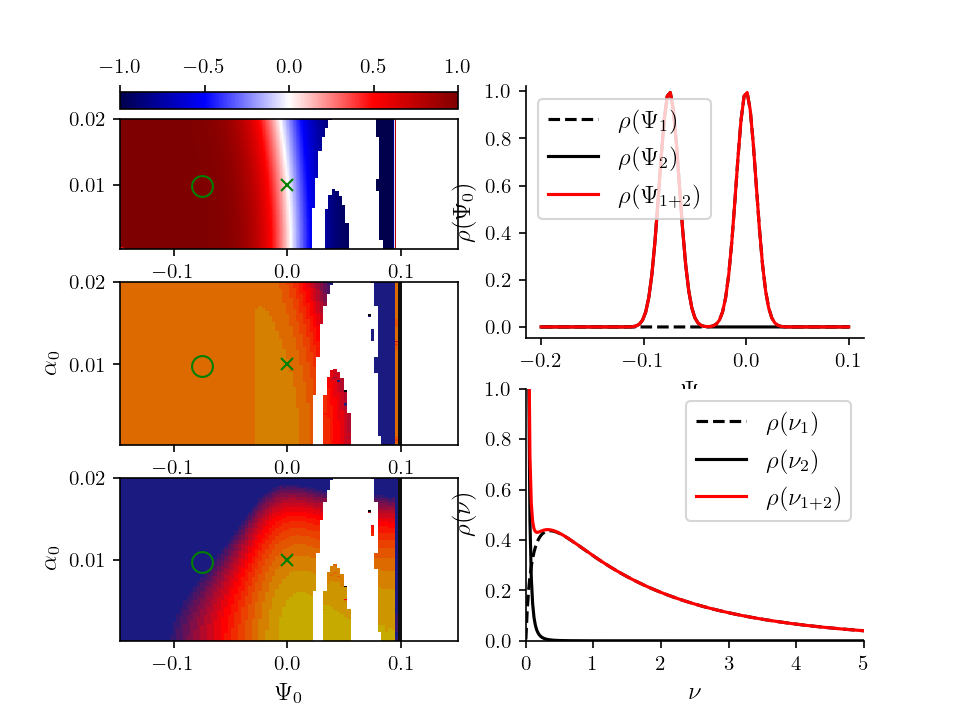

interactive(children=(IntSlider(value=20, description='$\\displaystyle \\Phi_0$'), IntSlider(value=20, descrip…

In [6]:
%matplotlib nbagg
set_plot_params()

fig = plt.figure()

#fig,ax = plt.subplots(2,2,figsize=(7.5,5),dpi=100)
plt_para = {
    'ax_label': [],
    'const_label': []
}

ax_phase_nu = fig.add_subplot(321)
ax_phase1 = fig.add_subplot(323)
ax_phase2 = fig.add_subplot(325)
ax_threshold = fig.add_subplot(222)
ax_firingrate = fig.add_subplot(224)


for axx in [ax_phase1,ax_phase2]:
    plt.setp(axx,xlabel='$\\Psi_0$',ylabel='$\\alpha_0$')

plt.setp(ax_threshold,xlabel='$\\Psi_0$',ylabel='$\\rho(\\Psi_0)$')
plt.setp(ax_firingrate,xlabel='$\\nu$',ylabel='$\\rho(\\nu)$',xlim=[0,5*options['rateWnt']])

ax_threshold.spines[['top','right']].set_visible(False)
ax_firingrate.spines[['top','right']].set_visible(False)

#x=70; y=40
x=20; y=20

nu_1 = get_nu_bar(res['gamma'][0,...],res['delta'][0,...],res['rate_max'][0,...])
#for i in range(0,steps):
#    col = [1-(i+1)/steps]*3
#    ax_phase_nu.plot(res['Psi_0'],nu_1[i,:],'-',color=col)
    
#ax[1][0].plot(res['alpha_0'],nu_2,'k-')
if 'rateWnt' in order[:2]:
    rates = res['rateWnt']
rates = options['rateWnt']

h_im1 = ax_phase_nu.imshow(nu_1-rates,origin='lower',vmin=-options['rateWnt'],vmax=options['rateWnt'],cmap='seismic',extent=[res[order[0]][0],res[order[0]][-1],res[order[1]][0],res[order[1]][-1]],aspect='auto')
ax_cb = fig.colorbar(h_im1, ax=ax_phase_nu, location='top', anchor=(0, 0.3), shrink=1.0)
plt.setp(ax_cb.ax.get_xaxis(),label='$\\delta\\nu$')

for p,axx in enumerate([ax_phase1,ax_phase2]):
    plot_fins(axx,res[order[0]],res[order[1]],res['gamma'][p,...],res['chi'][p,...],res['regions'][p,...],plt_para)

for axx in [ax_phase_nu,ax_phase1,ax_phase2]:
    axx.plot(options['Psi_0'],options['alpha_0'],'x',color='green',markersize=6)
    
def plot_phase_loc(x,y,handles=None):
    
    if handles:
        h_lnu,h_l1,h_l2 = handles
        
        h_lnu.set_xdata(x)
        h_lnu.set_ydata(y)

        h_l1.set_xdata(x)
        h_l1.set_ydata(y)
        
        h_l2.set_xdata(x)
        h_l2.set_ydata(y)
        
    else:
        h_lnu, = ax_phase_nu.plot(x,y,'o',color='green',markersize=10,markerfacecolor='none')
        h_l1, = ax_phase1.plot(x,y,'o',color='green',markersize=10,markerfacecolor='none')
        h_l2, = ax_phase2.plot(x,y,'o',color='green',markersize=10,markerfacecolor='none')
    
    return [h_lnu,h_l1,h_l2]

alpha_arr = np.linspace(-0.2,0.1,101)
def plot_thresholds(psi_1,psi_2,alpha_1,alpha_2,handles=None):

    p_threshold_1 = np.exp(-(alpha_arr - psi_1)**2./(2*alpha_1**2))
    p_threshold_2 = np.exp(-(alpha_arr - psi_2)**2./(2*alpha_2**2))
    
    if handles:
        h_a1,h_a2,h_a12 = handles
        
        h_a1.set_ydata(p_threshold_1)
        h_a2.set_ydata(p_threshold_2)
        h_a12.set_ydata(p_threshold_1+p_threshold_2)
    else:
        h_a1, = ax_threshold.plot(alpha_arr,p_threshold_1,'k--',label='$\\rho(\\Psi_1)$')
        h_a2, = ax_threshold.plot(alpha_arr,p_threshold_2,'k-',label='$\\rho(\\Psi_2)$')
        h_a12, = ax_threshold.plot(alpha_arr,p_threshold_1+p_threshold_2,'r-',label='$\\rho(\\Psi_{1+2})$')
        ax_threshold.legend()

    return [h_a1,h_a2,h_a12]

nu = np.linspace(1/1000,20,1000)
def plot_distributions(gamma_1,gamma_2,delta_1,delta_2,nu_max_1,nu_max_2,handles=None):
    
    p_nu_1 = p_nu(nu,gamma_1,delta_1,nu_max_1)
    p_nu_2 = p_nu(nu,gamma_2,delta_2,nu_max_2)
    
    if handles:
        h_p1,h_p2,h_p12 = handles
        h_p1.set_ydata(p_nu_1)
        h_p2.set_ydata(p_nu_2)
        h_p12.set_ydata(p_nu_1+p_nu_2)
    else:
        h_p1, = ax_firingrate.plot(nu,p_nu_1,'k--',label='$\\rho(\\nu_1)$')
        h_p2, = ax_firingrate.plot(nu,p_nu_2,'k-',label='$\\rho(\\nu_2)$')
        h_p12, = ax_firingrate.plot(nu,p_nu_1+p_nu_2,'r-',label='$\\rho(\\nu_{1+2})$')
        ax_firingrate.legend()
        
    plt.setp(ax_firingrate,ylim=[0,1.])
    
    return [h_p1,h_p2,h_p12]

#h_thresholds = plot_thresholds(0,0.01,0.01,0.01)
#h_distributions = plot_distributions(1.2,1.2,2.5,3.0,20,20)

# plt.setp(big_ax,xlabel=r"$\Psi_0$",ylabel=r'$\alpha_0$')

x_widget = widgets.IntSlider(x,min=0,max=steps,orientation='horizontal',description=r'$\displaystyle \Phi_0$')
y_widget = widgets.IntSlider(y,min=0,max=steps,orientation='horizontal',description=r'$\displaystyle \alpha_0$')

#fig.tight_layout(pad=3.0)
#if save:
#    sv_name = './figures/two_pop_n.%s' % (file_format)
#    plt.savefig(sv_name,format=file_format,dpi=600)
#    print('Figure saved as "%s"' % sv_name)

global h_loc, h_thresholds, h_distributions
h_loc = None
h_thresholds = None
h_distributions = None

def update_plot(x,y):
    if 'alpha_0' in order[:2]:
        alpha_0 = res['alpha_0'][y]
    else:
        alpha_0 = options['alpha_0']
    psi_0 = res['Psi_0'][x]
    scnd = res[order[1]][y]
    print(psi_0,alpha_0)
    
    global h_loc, h_thresholds, h_distributions
    
    h_loc = plot_phase_loc(psi_0,scnd,h_loc)
    
    h_thresholds = plot_thresholds(0,psi_0,alpha_0,alpha_0,h_thresholds)

    gamma_1 = res['gamma'][-2,y,x]
    gamma_2 = res['gamma'][-1,y,x]
    delta_1 = res['delta'][-2,y,x]
    delta_2 = res['delta'][-1,y,x]
    nu_max_1 = res['rate_max'][-2,y,x]
    nu_max_2 = res['rate_max'][-1,y,x]

    h_distributions = plot_distributions(gamma_1,gamma_2,delta_1,delta_2,nu_max_1,nu_max_2,h_distributions)

#plt.tight_layout()

widgets.interactive(update_plot,x=x_widget,y=y_widget)
    

# plt.show(block=False)


<IPython.core.display.Javascript object>


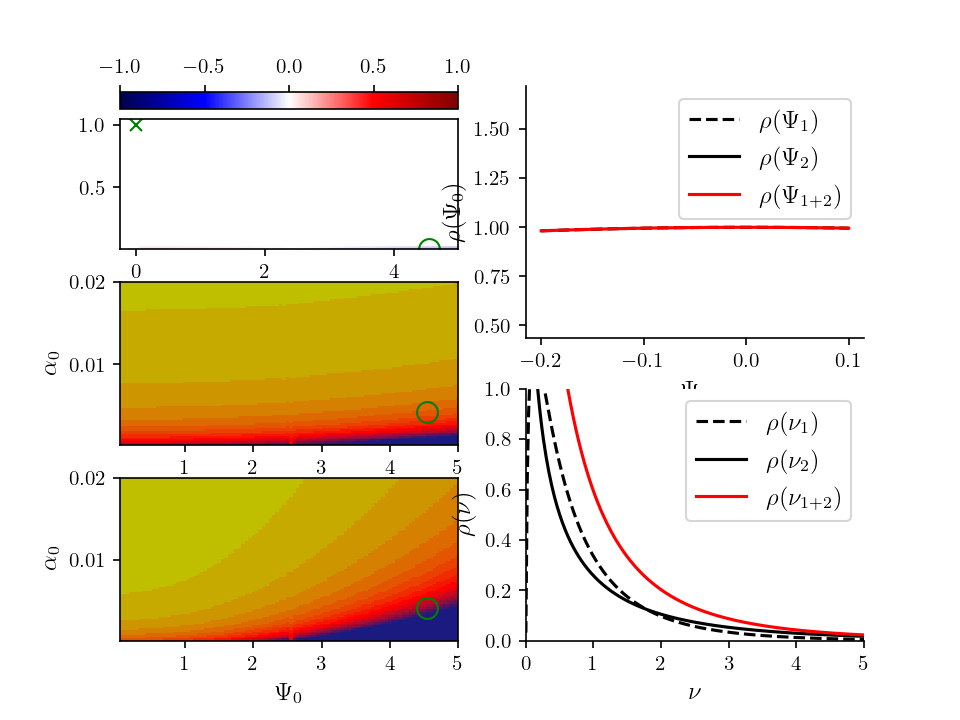

interactive(children=(IntSlider(value=20, description='$\\displaystyle \\Phi_0$'), IntSlider(value=20, descrip…

In [28]:
%matplotlib nbagg
set_plot_params()

fig = plt.figure()

#fig,ax = plt.subplots(2,2,figsize=(7.5,5),dpi=100)
plt_para = {
    'ax_label': [],
    'const_label': []
}

ax_phase_nu = fig.add_subplot(321)
ax_phase1 = fig.add_subplot(323)
ax_phase2 = fig.add_subplot(325)
ax_threshold = fig.add_subplot(222)
ax_firingrate = fig.add_subplot(224)


for axx in [ax_phase1,ax_phase2]:
    plt.setp(axx,xlabel='$\\Psi_0$',ylabel='$\\alpha_0$')

plt.setp(ax_threshold,xlabel='$\\Psi_0$',ylabel='$\\rho(\\Psi_0)$')
plt.setp(ax_firingrate,xlabel='$\\nu$',ylabel='$\\rho(\\nu)$',xlim=[0,5*options_['rateWnt']])

ax_threshold.spines[['top','right']].set_visible(False)
ax_firingrate.spines[['top','right']].set_visible(False)

#x=70; y=40
x=20; y=20

nu_1 = get_nu_bar(res_['gamma'][0,...],res_['delta'][0,...],res_['rate_max'][0,...])
#for i in range(0,steps):
#    col = [1-(i+1)/steps]*3
#    ax_phase_nu.plot(res['Psi_0'],nu_1[i,:],'-',color=col)
    
#ax[1][0].plot(res['alpha_0'],nu_2,'k-')
if 'rateWnt' in order_[:2]:
    rates = res_['rateWnt']
rates = options_['rateWnt']

h_im1 = ax_phase_nu.imshow(nu_1-rates,origin='lower',vmin=-options_['rateWnt'],vmax=options_['rateWnt'],cmap='seismic',extent=[res_[order_[0]][0],res_[order_[0]][-1],res_[order_[1]][0],res_[order_[1]][-1]],aspect='auto')
ax_cb = fig.colorbar(h_im1, ax=ax_phase_nu, location='top', anchor=(0, 0.3), shrink=1.0)
plt.setp(ax_cb.ax.get_xaxis(),label='$\\delta\\nu$')

for p,axx in enumerate([ax_phase1,ax_phase2]):
    plot_fins(axx,res_[order_[0]],res_[order_[1]],res_['gamma'][p,...],res_['chi'][p,...],res_['regions'][p,...],plt_para)

for axx in [ax_phase_nu,ax_phase1,ax_phase2]:
    axx.plot(options_['Psi_0'],options_['rateWnt'],'x',color='green',markersize=6)
    
def plot_phase_loc(x,y,handles=None):
    
    if handles:
        h_lnu,h_l1,h_l2 = handles
        
        h_lnu.set_xdata(x)
        h_lnu.set_ydata(y)

        h_l1.set_xdata(x)
        h_l1.set_ydata(y)
        
        h_l2.set_xdata(x)
        h_l2.set_ydata(y)
        
    else:
        h_lnu, = ax_phase_nu.plot(x,y,'o',color='green',markersize=10,markerfacecolor='none')
        h_l1, = ax_phase1.plot(x,y,'o',color='green',markersize=10,markerfacecolor='none')
        h_l2, = ax_phase2.plot(x,y,'o',color='green',markersize=10,markerfacecolor='none')
    
    return [h_lnu,h_l1,h_l2]

alpha_arr = np.linspace(-0.2,0.1,101)
def plot_thresholds(psi_1,psi_2,alpha_1,alpha_2,handles=None):

    p_threshold_1 = np.exp(-(alpha_arr - psi_1)**2./(2*alpha_1**2))
    p_threshold_2 = np.exp(-(alpha_arr - psi_2)**2./(2*alpha_2**2))
    
    if handles:
        h_a1,h_a2,h_a12 = handles
        
        h_a1.set_ydata(p_threshold_1)
        h_a2.set_ydata(p_threshold_2)
        h_a12.set_ydata(p_threshold_1+p_threshold_2)
    else:
        h_a1, = ax_threshold.plot(alpha_arr,p_threshold_1,'k--',label='$\\rho(\\Psi_1)$')
        h_a2, = ax_threshold.plot(alpha_arr,p_threshold_2,'k-',label='$\\rho(\\Psi_2)$')
        h_a12, = ax_threshold.plot(alpha_arr,p_threshold_1+p_threshold_2,'r-',label='$\\rho(\\Psi_{1+2})$')
        ax_threshold.legend()

    return [h_a1,h_a2,h_a12]

nu = np.linspace(1/1000,20,1000)
def plot_distributions(gamma_1,gamma_2,delta_1,delta_2,nu_max_1,nu_max_2,handles=None):
    
    p_nu_1 = p_nu(nu,gamma_1,delta_1,nu_max_1)
    p_nu_2 = p_nu(nu,gamma_2,delta_2,nu_max_2)
    
    if handles:
        h_p1,h_p2,h_p12 = handles
        h_p1.set_ydata(p_nu_1)
        h_p2.set_ydata(p_nu_2)
        h_p12.set_ydata(p_nu_1+p_nu_2)
    else:
        h_p1, = ax_firingrate.plot(nu,p_nu_1,'k--',label='$\\rho(\\nu_1)$')
        h_p2, = ax_firingrate.plot(nu,p_nu_2,'k-',label='$\\rho(\\nu_2)$')
        h_p12, = ax_firingrate.plot(nu,p_nu_1+p_nu_2,'r-',label='$\\rho(\\nu_{1+2})$')
        ax_firingrate.legend()
        
    plt.setp(ax_firingrate,ylim=[0,1.])
    
    return [h_p1,h_p2,h_p12]

#h_thresholds = plot_thresholds(0,0.01,0.01,0.01)
#h_distributions = plot_distributions(1.2,1.2,2.5,3.0,20,20)

# plt.setp(big_ax,xlabel=r"$\Psi_0$",ylabel=r'$\alpha_0$')

x_widget = widgets.IntSlider(x,min=0,max=steps,orientation='horizontal',description=r'$\displaystyle \Phi_0$')
y_widget = widgets.IntSlider(y,min=0,max=steps,orientation='horizontal',description=r'$\displaystyle \alpha_0$')

#fig.tight_layout(pad=3.0)
#if save:
#    sv_name = './figures/two_pop_n.%s' % (file_format)
#    plt.savefig(sv_name,format=file_format,dpi=600)
#    print('Figure saved as "%s"' % sv_name)

global h_loc, h_thresholds, h_distributions
h_loc = None
h_thresholds = None
h_distributions = None

def update_plot(x,y):
    if 'rateWnt' in order_[:2]:
        alpha_0 = res_['rateWnt'][y]
    else:
        alpha_0 = options_['alpha_0']
    psi_0 = res_['rateWnt'][x]
    scnd = res_[order_[1]][y]
    print(psi_0,alpha_0)
    
    global h_loc, h_thresholds, h_distributions
    
    h_loc = plot_phase_loc(psi_0,scnd,h_loc)
    
    h_thresholds = plot_thresholds(0,psi_0,alpha_0,alpha_0,h_thresholds)

    gamma_1 = res_['gamma'][-2,y,x]
    gamma_2 = res_['gamma'][-1,y,x]
    delta_1 = res_['delta'][-2,y,x]
    delta_2 = res_['delta'][-1,y,x]
    nu_max_1 = res_['rate_max'][-2,y,x]
    nu_max_2 = res_['rate_max'][-1,y,x]

    h_distributions = plot_distributions(gamma_1,gamma_2,delta_1,delta_2,nu_max_1,nu_max_2,h_distributions)

#plt.tight_layout()

widgets.interactive(update_plot,x=x_widget,y=y_widget)
    

# plt.show(block=False)


In [24]:
res_.keys()

dict_keys(['alpha_0', 'rateWnt', 'q', 'gamma', 'delta', 'rate_max', 'chi', 'I_balance', 'inc_trans', 'imp_trans', 'DM_trans', 'np_trans', 'regions', 'alpha_raw', 'alpha', 'sigma_V'])

In [287]:
order

['Psi_0', 'rateWnt', 'sim_prim', 'sim_sec']

In [278]:
res.keys()

dict_keys(['Psi_0', 'tau_I', 'q', 'gamma', 'delta', 'rate_max', 'chi', 'I_balance', 'regions', 'alpha_raw', 'alpha', 'sigma_V'])

In [246]:
res['alpha'][0,0,:]

masked_array(data=[0.        , 0.02610517, 0.02610516, 0.02610516,
                   0.02610516, 0.02610515, 0.02610514, 0.02610513,
                   0.02610511, 0.02610509, 0.02610505, 0.02610499,
                   0.0261049 , 0.02610478, 0.02610461, 0.02610436,
                   0.026104  , 0.0261035 , 0.0261028 , 0.02610183,
                   0.02610049, 0.02609865, 0.02609614, 0.02609275,
                   0.02608819, 0.02608211, 0.02607407, 0.02606351,
                   0.02604978, 0.02603206, 0.02600943, 0.0259808 ,
                   0.02594497, 0.0259006 , 0.02584631, 0.02578066,
                   0.02570227, 0.02560988, 0.02550241, 0.02537911,
                   0.0252396 , 0.02508398, 0.02491291, 0.02472763,
                   0.02453006, 0.0243228 , 0.02410907, 0.02389276,
                   0.02367824, 0.02347026, 0.02327374, 0.02309347,
                   0.02293384, 0.02279852, 0.02269013, 0.02261008,
                   0.02255843, 0.02253393, 0.02253418,        

In [226]:
res['alpha'][0,...]**2

masked_array(
  data=[[0.0, 0.0006814796542279625, 0.0006814795742296108, ..., --, --,
         --],
        [0.0006814797049354402, 0.0006814796525517409,
         0.0006814795716854578, ..., --, --, --],
        [0.0006814797030796183, 0.0006814796497184548,
         0.0006814795673869661, ..., --, --, --],
        ...,
        [0.00067844541172566, 0.0006781505227573434,
         0.0006778433089627815, ..., --, --, --],
        [0.0006783833596477875, 0.0006780954862413195,
         0.000677797938841506, ..., --, --, --],
        [0.0006783295113405317, 0.0006780501888981572,
         0.0006777639861320174, ..., --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]],
  fill_

[[-- -0.9999995134079701 -0.999999222128132 ... -- -- --]
 [-0.9999996946130026 -0.9999995087956631 -0.9999992150006682 ... -- --
  --]
 [-0.9999996895768241 -0.9999995009614248 -0.9999992028993614 ... -- --
  --]
 ...
 [-0.9972831472578074 -0.9967260045033158 -0.9960637133164415 ... --
  -0.9975567090113033 -0.9976325499762693]
 [-0.9971018441000702 -0.9965145026454234 -0.995817706932452 ...
  0.9999999977184376 -- -0.9974710148273319]
 [-0.9969110580605848 -0.9962923808760118 -0.9955598566029328 ...
  0.9999992635095308 -1.0 -0.9973184651285778]]


<IPython.core.display.Javascript object>


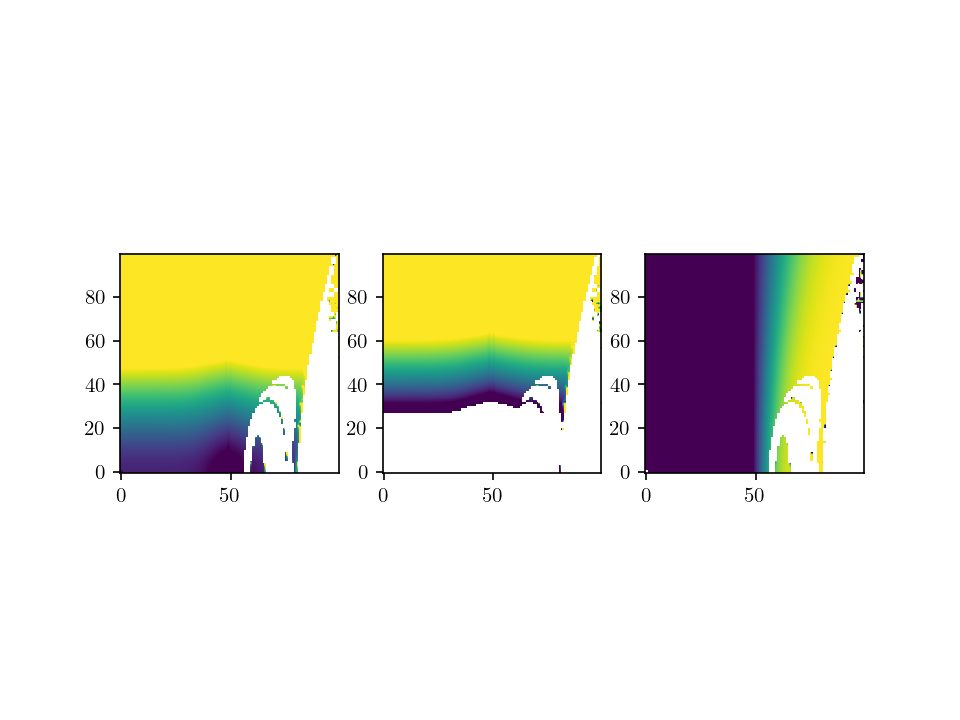

/tmp/ipykernel_2354790/891414946.py:13: RuntimeWarning: invalid value encountered in sqrt
  ax[1].imshow(np.sqrt(res['alpha'][1,...].T**2-options['alpha_0']**2).T,vmin=0.01,vmax=0.03,origin='lower')


In [65]:
#print(res['alpha'][0,...])

nu_1 = get_nu_bar(res['gamma'][0,...],res['delta'][0,...],res['rate_max'][0,...])
nu_2 = get_nu_bar(res['gamma'][1,...],res['delta'][1,...],res['rate_max'][1,...])

nu_mean = 1/2 * (nu_1+nu_2)
print((nu_mean-nu_1)/nu_mean)
#print(nu_1)
#print(nu_2)

fig, ax = plt.subplots(1,3)
ax[0].imshow(np.sqrt(res['alpha'][0,...].T**2).T,vmin=0.01,vmax=0.03,origin='lower')
ax[1].imshow(np.sqrt(res['alpha'][1,...].T**2-options['alpha_0']**2).T,vmin=0.01,vmax=0.03,origin='lower')
ax[2].imshow((nu_mean-nu_1)/nu_mean,origin='lower',vmin=0,vmax=1)
plt.show()

<IPython.core.display.Javascript object>


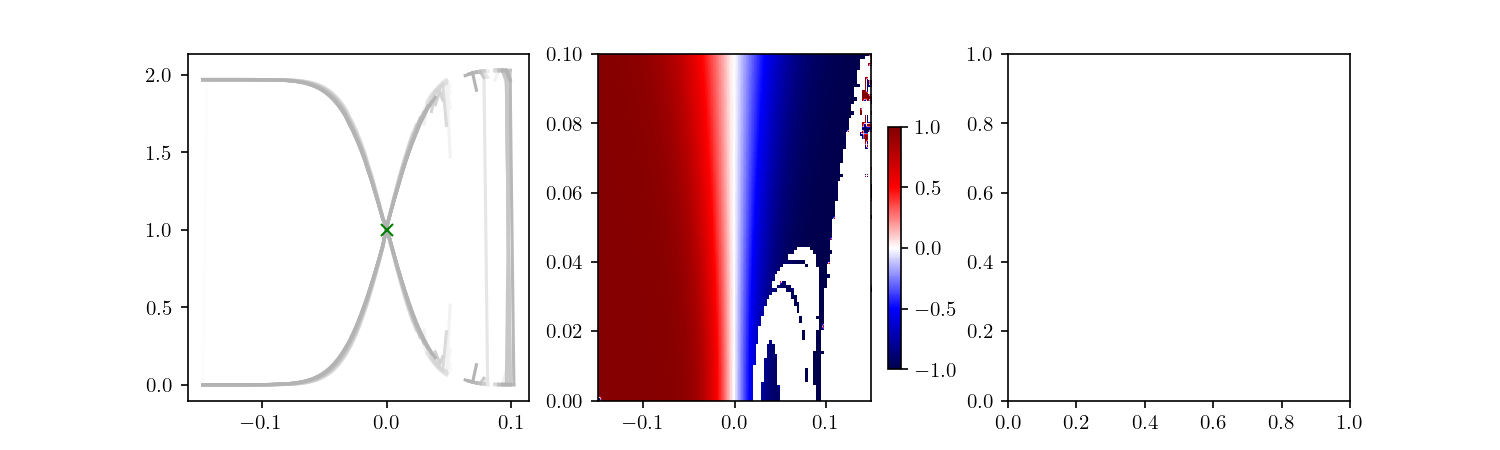

[0.0 1.9706962134377504 1.9706959282763634 ... 8.606408022951105e-18
 8.932885594328048e-32 2.0241094787008067]


ValueError: s must be a scalar, or float array-like with the same size as x and y

In [73]:
p=0
nu_1 = get_nu_bar(res['gamma'][0,...],res['delta'][0,...],res['rate_max'][0,...])
nu_2 = get_nu_bar(res['gamma'][1,...],res['delta'][1,...],res['rate_max'][1,...])
fig,ax = plt.subplots(1,3,figsize=(10,3))
for i in range(0,30):
    col = [1-(i+1)/steps]*3
    ax[0].plot(res['Psi_0'],nu_2[i,:],'-',color=col)
    ax[0].plot(res['Psi_0'],nu_1[i,:],'-',color=col)
    
ax[0].plot(0,1,'gx',markersize=6)
    
#ax[1][0].plot(res['alpha_0'],nu_2,'k-')
h_im1 = ax[1].imshow(nu_1-options['rateWnt'],origin='lower',vmin=-options['rateWnt'],vmax=options['rateWnt'],cmap='seismic',extent=[-0.15,0.15,0,0.1],aspect='auto')
fig.colorbar(h_im1, ax=ax[1], location='right', anchor=(0, 0.3), shrink=0.7)

#h_im2 = ax[1][1].imshow(nu_2-5,origin='lower',vmin=-5,vmax=5,cmap='seismic')
#fig.colorbar(h_im2, ax=ax[1][1], location='right', anchor=(0, 0.3), shrink=0.7)
print(nu_1.flatten())
ax[2].scatter(nu_1.flatten(),nu_2.flatten(),'.')
plt.show()